In [14]:
import scipy.io
import scipy.ndimage
import numpy as np
from scipy.sparse.linalg import spsolve
from scipy import sparse
import matplotlib.pyplot as plt
from functools import partial

import torch
from Solver import *
# from NeuralNet import *
from timeit import default_timer

import sys
sys.path.append('../Utility')
import NeuralNet


In [15]:
L = 1.0
Ny = 200
yy = np.linspace(0.0, L, Ny)
# f = 6*(1-2*yy)**2 - 2*(yy - yy**2)*(1 - 2*yy)**2 + 2*(yy - yy**2)**2 + 2 

f = -np.ones_like(yy)
dbc = np.array([0.0, 0.0]) 


# Training a quadratic function
 $$D(\theta) = \sqrt{\theta^2 + (\frac{\partial \theta}{\partial x})^2}$$

In [3]:
def solve(ref_permeability, MODEL = "exp_nummodel", dt = 5.0e-6, Nt = 500000, save_every = 100000, L=1.0):
    if MODEL == "exp_nummodel":

        model = lambda q, yy, res : nummodel(ref_permeability, q, yy, res)
        yy_ref, t_data_ref, q_data_ref = explicit_solve(model, f, dbc, dt = dt, Nt = Nt, save_every = save_every, L = L)

    elif MODEL == "imp_nummodel":

        model = lambda q, yy, res, V : nummodel_jac(ref_permeability, q, yy, res, V, True, D_ref_permeability)  
        yy_ref, t_data_ref, q_data_ref = implicit_solve(model, f, dbc, dt = dt, Nt = Nt, save_every = save_every, L = L)

    elif MODEL == "imp_Newton_nummodel":

        model = lambda q, yy, res, V : nummodel_jac(ref_permeability, q, yy, res, V, True, D_ref_permeability)  
        yy_ref, t_data_ref, q_data_ref = implicit_Newton_solve(model, f, dbc, dt = dt, Nt = Nt, save_every = save_every, L = L, Newton_eps = 1e-3, Newton_maxiterstep = 1000)

    else:
        print("ERROR")


    plt.figure()
    plt.plot(yy_ref, q_data_ref[-1, :],  "--o", fillstyle="none", label="q")

    plt.xlabel("y")
    plt.legend()
    plt.show()


 



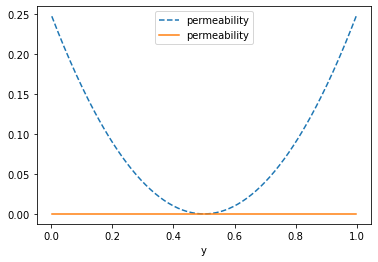

100000 max q 3.9941381927195634
200000 max q 4.991414297465661
300000 max q 5.149026332585167
400000 max q 5.173065641773646
500000 max q 5.176721860828194
600000 max q 5.17727782110645
700000 max q 5.177362358205832
800000 max q 5.177375212560493
900000 max q 5.177377167139006
1000000 max q 5.177377464343516


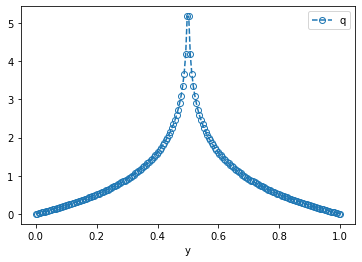

In [51]:
yy_c = (yy[0:-1] + yy[1:])/2.0
permeability = (yy_c - L/2)**2 
def ref_permeability(q, dq):
    return permeability
def D_ref_permeability(q, dq):
    return np.zeros_like(q), np.zeros_like(dq)


plt.figure()
plt.plot(yy_c, permeability,  "--", fillstyle="none", label="permeability")

plt.plot(yy_c, np.zeros_like(yy_c),  "-", fillstyle="none", label="permeability")

plt.xlabel("y")
plt.legend()
plt.show()

solve(ref_permeability, MODEL = "exp_nummodel", dt = 5.0e-5, Nt = 1000000)
#solve(ref_permeability, MODEL = "imp_nummodel", dt = 1.0e-2, Nt = 2000)

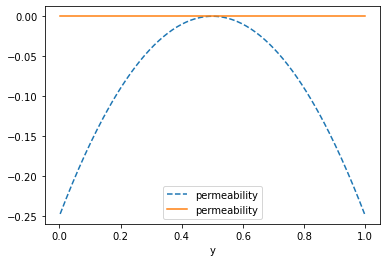

1 max q:  0.00035626908533671517  L2 res:  14.071247279470288
2 max q:  0.01046005942080928  L2 res:  18.703330536982133


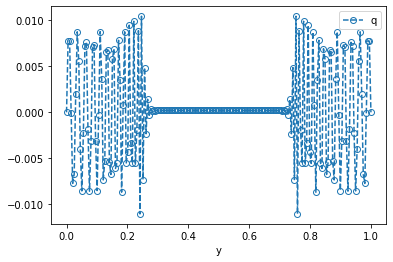

In [11]:
yy_c = (yy[0:-1] + yy[1:])/2.0
permeability = -(yy_c - L/2)**2 
def ref_permeability(q, dq):
    return permeability
def D_ref_permeability(q, dq):
    return np.zeros_like(q), np.zeros_like(dq)


plt.figure()
plt.plot(yy_c, permeability,  "--", fillstyle="none", label="permeability")

plt.plot(yy_c, np.zeros_like(yy_c),  "-", fillstyle="none", label="permeability")

plt.xlabel("y")
plt.legend()
plt.show()

#solve(ref_permeability, MODEL = "exp_nummodel", dt = 5.0e-5, Nt = 1000000)
solve(ref_permeability, MODEL = "imp_nummodel", dt = 1.0e-4, Nt = 2, save_every=1)

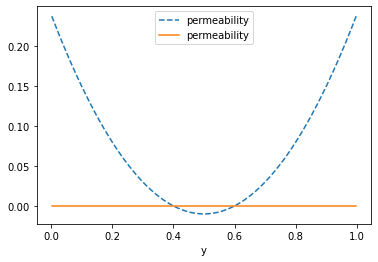

../Utility/Numerics.py:47: RuntimeWarning: overflow encountered in true_divide
  d_omega = (omega[1:nx] - omega[0:nx-1]) / (dx)
../Utility/Numerics.py:59: RuntimeWarning: invalid value encountered in add
  c_omega = (omega[0:nx-1] + omega[1:nx]) / 2.0
../Utility/Numerics.py:47: RuntimeWarning: invalid value encountered in subtract
  d_omega = (omega[1:nx] - omega[0:nx-1]) / (dx)


100000 max q nan
200000 max q nan
300000 max q nan
400000 max q nan
500000 max q nan
600000 max q nan


KeyboardInterrupt: 

In [16]:
yy_c = (yy[0:-1] + yy[1:])/2.0
permeability = (yy_c - L/2)**2 - 0.01
def ref_permeability(q, dq):
    return permeability
def D_ref_permeability(q, dq):
    return np.zeros_like(q), np.zeros_like(dq)


plt.figure()
plt.plot(yy_c, permeability,  "--", fillstyle="none", label="permeability")

plt.plot(yy_c, np.zeros_like(yy_c),  "-", fillstyle="none", label="permeability")

plt.xlabel("y")
plt.legend()
plt.show()

solve(ref_permeability, MODEL = "exp_nummodel", dt = 5.0e-5, Nt = 1000000)


In [17]:
yy_c = (yy[0:-1] + yy[1:])/2.0
permeability = (yy_c - L/2)**2 - 0.01
def ref_permeability(q, dq):
    return q
def D_ref_permeability(q, dq):
    return  np.ones_like(q), np.zeros_like(dq)


# plt.figure()
# plt.plot(yy_c, permeability,  "--", fillstyle="none", label="permeability")

# plt.plot(yy_c, np.zeros_like(yy_c),  "-", fillstyle="none", label="permeability")

# plt.xlabel("y")
# plt.legend()
# plt.show()

solve(ref_permeability, MODEL = "exp_nummodel", dt = 1.0e-5, Nt = 1000000)


/central/home/dzhuang/Code/Point-Jet/Poisson_model/Solver.py:228: RuntimeWarning: overflow encountered in multiply
  res[:] = gradient_first_c2f(mu_c*(dq_c), dy)
../Utility/Numerics.py:33: RuntimeWarning: invalid value encountered in subtract
  d_omega = (omega[1:nx] - omega[0:nx-1]) / (dx)


100000 max q nan
200000 max q nan


KeyboardInterrupt: 